# Business District Analysis by Sangho Suh

## Table of Contents

## I. Introduction
- Abstract
- Environment Setting

## II. Exploratory Data Analysis (EDA)
- Data Wrangling
- Hypothesis Formulation

## III. Hypothesis Testing
- Data Visualization

## VI. Conclusion

#### NOTE: 'A' in the beginning of comment indicates 'Analysis', while 'E' indicates 'Explanation.' 'Note' is a side note and thus NOT a critical part of the assignment.

## I. Introduction

- Abstract

The goal of this assignment is to explore the given dataset and combine it with public dataset of our choice to hypothesize a claim and test it.

- Environment Setting

In [5]:
print 'hello'

hello


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## II. Exploratory Data Analysis (EDA)

- Data Wrangling

#### Let's visualize dataset to understand it

Note: One problem encountered was that Korean characters come broken when pandas.read_csv() is used. 
      This is due to the fact that read_csv() does not use encoding('UTF-8') as default, which is needed
      for properly displaying Korean characters
      After displaying them using the following code, 'data wrangling' (or a.k.a 'data munging') was required
      to properly use district names in the later part of this assignment.

In [8]:
# reference
# http://freeprog.tistory.com/10

import codecs
import csv

# unicode_csv_reader(), utf_8_encoder()  
#     --->  https://docs.python.org/2/library/csv.html 에서 제공함.

def unicode_csv_reader(unicode_csv_data, dialect=csv.excel, **kwargs):
    # csv.py doesn't do Unicode; encode temporarily as UTF-8:
    csv_reader = csv.reader(utf_8_encoder(unicode_csv_data),
                            dialect=dialect, **kwargs)
    for row in csv_reader:
        # decode UTF-8 back to Unicode, cell by cell:
        yield [unicode(cell, 'utf-8') for cell in row]
 
def utf_8_encoder(unicode_csv_data):
    for line in unicode_csv_data:
        yield line.encode('utf-8')  
        
data = []
  
with codecs.open('1_total.csv','r', encoding = 'euc-kr') as csvf:
    rd = unicode_csv_reader(csvf)
    t = next(rd)
    for fieldname in t:
        print fieldname,
        
    print
        
    for idx, data in enumerate(rd):
        print idx, data[0], data[1], data[2] 


province city total category
0 서울특별시 강남구 38476 
1 서울특별시 서초구 23099 
2 서울특별시 송파구 19646 
3 서울특별시 영등포구 17657 
4 서울특별시 중구 17627 
5 서울특별시 마포구 16067 
6 서울특별시 종로구 15648 
7 서울특별시 강동구 14585 
8 서울특별시 강서구 14574 
9 서울특별시 양천구 14154 
10 서울특별시 노원구 13777 
11 서울특별시 광진구 13254 
12 서울특별시 구로구 13167 
13 서울특별시 관악구 13094 
14 서울특별시 은평구 12545 
15 서울특별시 용산구 12531 
16 서울특별시 성동구 12489 
17 서울특별시 동대문구 12058 
18 서울특별시 동작구 12055 
19 서울특별시 성북구 11488 
20 서울특별시 중랑구 10888 
21 서울특별시 서대문구 10814 
22 서울특별시 금천구 10611 
23 서울특별시 도봉구 9758 
24 서울특별시 강북구 9621 


#### Let's read Data 

In [9]:
# Read data
df_total = pd.read_csv('1_total.csv')
df_top_business = pd.read_csv('1_top_business.csv')

df_medical = pd.read_csv('1_medical.csv')
df_education = pd.read_csv('1_education.csv')
df_food = pd.read_csv('1_food.csv')
df_wholesale = pd.read_csv('1_wholesale.csv')
df_service = pd.read_csv('1_service.csv')

#### What does it look like?

In [10]:
df_total.head()

,province,city,total,category
0,����Ư����,������,38476,��ü
1,����Ư����,���ʱ�,23099,��ü
2,����Ư����,���ı�,19646,��ü
3,����Ư����,��������,17657,��ü
4,����Ư����,�߱�,17627,��ü


In [11]:
total_lst = df_total['total'].tolist()
top_business_lst = df_top_business['total'].tolist()

# Individual sectors are as follows
medical_lst = df_medical['total'].tolist()
education_lst = df_education['total'].tolist()
food_lst = df_food['total'].tolist()
wholesale_lst = df_wholesale['total'].tolist()
service_lst = df_service['total'].tolist()

#### Let's gain insights about data through statistics and visualizations

In [12]:
# Brief statistics

print 'Overview\n'
print 'Max: ' + str(df_total['total'].max())
print 'Min: ' + str(df_total['total'].min())
print 'Max - Min: ' + str( df_total['total'].max() - df_total['total'].min() )
print 'Average: ' + str(int(df_total['total'].mean()))
print 'Standard deviation: ' + str( int(df_total['total'].std()) )
sixty_five_percent = [int(df_total['total'].mean() + df_total['total'].std()), int(df_total['total'].mean() - df_total['total'].std())]
ninety_five_percent = [int(df_total['total'].mean() + 2*df_total['total'].std()), int(df_total['total'].mean() - 2*df_total['total'].std())]
print '65% range: ' + str(sixty_five_percent) + ' (one standard deviation)'
print '95% range: ' + str(ninety_five_percent) + ' (two standard deviation)'

Overview

Max: 38476
Min: 9621
Max - Min: 28855
Average: 14787
Standard deviation: 5857
65% range: [20644, 8929] (one standard deviation)
95% range: [26502, 3071] (two standard deviation)


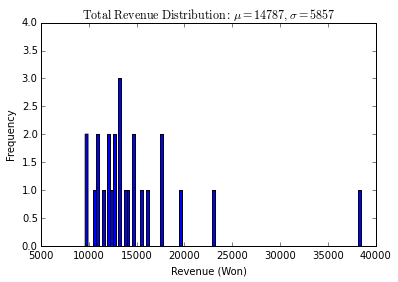

In [13]:
plt.hist(total_lst,bins=100)
plt.xlabel('Revenue (Won)')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Total\ Revenue\ Distribution:}\ \mu=14787,\ \sigma=5857$')
plt.axis([5000, 40000, 0, 4])

plt.show()

#### A: The above histogram shows that there is great polarization (양극화) on highest earning district ('kangnam') and less earning districts--note one bar in the range (35000,40000) and the rest in the range (7000,25000).

In [14]:
print 'Total number of districts: ' + str(len(total_lst))

Total number of districts: 25


In [15]:
top_6_dists = 0
bottom_19_dists = 0

for i in range(0,6):
    top_6_dists = top_6_dists + top_business_lst[i]
    
for j in range(7,25):
    bottom_19_dists = bottom_19_dists + top_business_lst[j]
    
print 'Revenue by top 6 districtss:    ' + str(top_6_dists)
print 'Revenue by bottom 19 districts: ' + str(bottom_19_dists)


Revenue by top 6 districtss:    52169
Revenue by bottom 19 districts: 53149


#### A: This illustrates that top 6 districts make as much as the remaining 19 districts

#### Let's see which business sectors contribute the most on these districts

In [16]:
print
print
print 'Get data before visualizing to identify which business contributes the most\n'

print 'Education Max: ' + str(df_education['total'].max())
print 'Education Min: ' + str(df_education['total'].min())
print
print 'Medical Max: ' + str(df_medical['total'].max())
print 'Medical Min: ' + str(df_medical['total'].min())
print
print 'Food Max: ' + str(df_food['total'].max())
print 'Food Min: ' + str(df_food['total'].min())
print
print 'Wholesale Max: ' + str(df_wholesale['total'].max())
print 'Wholesale Min: ' + str(df_wholesale['total'].min())



Get data before visualizing to identify which business contributes the most

Education Max: 6486
Education Min: 977

Medical Max: 23442
Medical Min: 3901

Food Max: 17872
Food Min: 4988

Wholesale Max: 22154
Wholesale Min: 6087


#### A: From the above, we can see that medical sector is the highest earning sector, followed by wholesale, food, and education sector.

In [17]:
from numpy import array

In [18]:
# create multi-dimensional matrix which is the format we need for visualizing in histogram

multi_lst = [education_lst,medical_lst,food_lst,wholesale_lst,service_lst]
arr = array(multi_lst)
arr = np.transpose(arr)

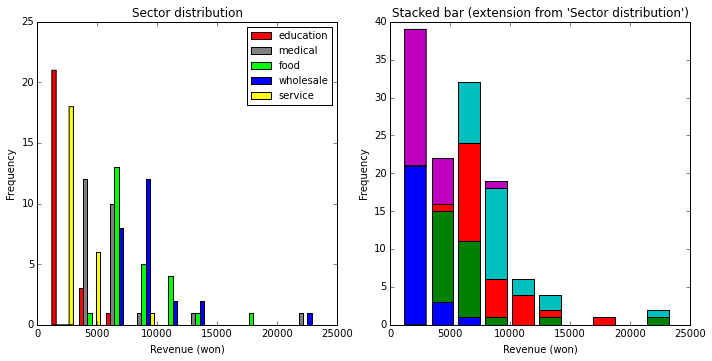

In [19]:
n_bins = 10

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax0, ax1 = axes.flat

colors = ['red', 'grey', 'lime','blue','yellow']
labels = ['education','medical','food','wholesale','service']

ax0.hist(arr, n_bins, normed=0, histtype='bar', color=colors, label=labels)
ax0.set_xlabel('Revenue (won)')
ax0.set_ylabel('Frequency')
ax0.legend(prop={'size': 10})
ax0.set_title('Sector distribution')

ax1.hist(arr, n_bins, normed=0, histtype='bar', stacked=True)
ax1.set_xlabel('Revenue (won)')
ax1.set_ylabel('Frequency')
ax1.set_title('Stacked bar (extension from \'Sector distribution\')')

plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)
plt.show()

#### E: The histogram above on the left demonstrates 'sector distribution.' 

#### A: From 'sector distribution,' we can see that 'education (red)', 'service (yellow)' sectors are concentrated in  lower ange than other sectors. Generally speaking, the top two sectors that seem to belong to higher revenue range are 'wholesale (blue)' and 'food (green).' The 'medical (grey)' sector seemes to be in-between. 

#### A: The histogram on the right ('Stacked bar' histogram) makes it clear that most of the revenues are less than 15,000 won.

Note that we have not analyzed individual districts yet. Let's see what kind of insights we can get from them.

#### Note: As mentioned in the early part of assignment, Korean characters are broken in IPython Notebook. Solutions were sought after, but after several attempts with no significant success, I had to resort to 'hard-coding' the list of districts in order to save time (as shown below).

In [20]:
# since the ordering of districts are different for each business sector, I hard-coded the list of districts

dist_total_section = ['kangnam','seocho','songpa','yeongdeungpo','jung','mapo','jongro','kangdong','kangseo','yangcheon','nowon','kwangjin','guro','kwanak','eunpyeong','yongsan','seongdong','dongdaemun','dongjak','seongbuk','joongrang','seodaemun','geumcheon','dobong','kangbuk']
dist_service_section = ['kangnam','seocho','songpa','mapo','kangseo','yeongdeungpo','kwanak','kwangjin','kangdong','jung','nowon','guro','yangcheon','seodaemun','eunpyeong','dongjak','seongbuk','joongrang','jongro','dongdaemun','kangbuk','seongdong','yongsan','geumcheon','dobong']
dist_food_section = ['kangnam','seocho','jung','jongro','mapo','yeongdeungpo','songpa','yongsan','kangseo','kangdong','kwanak','kwangjin','yangcheon','nowon','guro','dongjak','dongdaemun','seodaemun','eunpyeong','seongbuk','seongdong','geumcheon','joongrang','kangbuk','dobong']
dist_wholesale_section = ['kangnam','seocho','yeongdeungpo','jung','jongro','seongdong','mapo','yangcheon','kangseo','kangdong','guro','nowon','kwangjin','eunpeyong','dongdaemun','yongsan','dongjak','joongrang','geumcheon','seongbuk','kwanak','dobong','seodaemun','kangbuk']
dist_medical_section = ['kangnam','seocho','songpa','yeongdeungpo','kangdong','mapo','nowon','kwanak','kangseo','yangcheon','eunpyeong','jung','dongjak','guro','dongdaemun','jongro','seongbuk','kwangjin','seodaemun','seongdong','joongrang','yongsan','kangbuk','geumcheon','dobong']
dist_education_section = ['kangnam','seocho','yangcheon','songpa','nowon','kangseo','kangdong','mapo','dongjak','eunpyeong','yeongdeungpo','seodaemun','dongdaemun','kwangjin','kwanak','seongbuk','guro','jongro','dobong','yongsan','joongrang','seongdong','kangbuk','geumcheon','jung']

Let's transform this into matrix format which makes it easier for us to manipulate

In [21]:
# put lists into list
districts = [dist_service_section, dist_food_section, dist_wholesale_section, dist_medical_section, dist_education_section]
# transform list into numpy.array
np_dists = np.array(districts)

Let's define a function that allows us to see top n districts in terms of total revenue and each sectors' revenue

In [22]:
def print_top_districts(num):
    print 'Total Revenue \n' + str(dist_total_section[0:num])
    print
    print 'Service \n' + str(np_dists[0][0:num])
    print 'Food \n' + str(np_dists[1][0:num])
    print 'Wholesale \n' + str(np_dists[2][0:num])
    print 'Medical \n' + str(np_dists[3][0:num])
    print 'Education \n' + str(np_dists[4][0:num])

In [25]:
# check top n districts in terms of total revenue and each sectors' revenue
print_top_districts(5)

Total Revenue 
['kangnam', 'seocho', 'songpa', 'yeongdeungpo', 'jung']

Service 
['kangnam', 'seocho', 'songpa', 'mapo', 'kangseo']
Food 
['kangnam', 'seocho', 'jung', 'jongro', 'mapo']
Wholesale 
['kangnam', 'seocho', 'yeongdeungpo', 'jung', 'jongro']
Medical 
['kangnam', 'seocho', 'songpa', 'yeongdeungpo', 'kangdong']
Education 
['kangnam', 'seocho', 'yangcheon', 'songpa', 'nowon']


One information we have not looked at yet is top business (and its associated area). Let's take a look at it in order to finally formulate hypothesis from the insights gathered so far.

In [18]:
# reference
# http://freeprog.tistory.com/10

import codecs
import csv

# unicode_csv_reader(), utf_8_encoder()  
#     --->  https://docs.python.org/2/library/csv.html 에서 제공함.

def unicode_csv_reader(unicode_csv_data, dialect=csv.excel, **kwargs):
    # csv.py doesn't do Unicode; encode temporarily as UTF-8:
    csv_reader = csv.reader(utf_8_encoder(unicode_csv_data),
                            dialect=dialect, **kwargs)
    for row in csv_reader:
        # decode UTF-8 back to Unicode, cell by cell:
        yield [unicode(cell, 'utf-8') for cell in row]
 
def utf_8_encoder(unicode_csv_data):
    for line in unicode_csv_data:
        yield line.encode('utf-8')  
        
data = []
  
with codecs.open('1_top_business.csv','r', encoding = 'euc-kr') as csvf:
    rd = unicode_csv_reader(csvf)
    t = next(rd)
    for fieldname in t:
        print fieldname,
        
    print
        
    for idx, data in enumerate(rd):
        print idx, data[0], data[1], data[2], data[3], data[4], data[5]


province city area_name business_type total rank
0 서울특별시 강남구 강남역 아래 컴퓨터/주변기기 13598  1
1 서울특별시 강남구 압구정역 성형외과 11123  2
2 서울특별시 강남구 강남역 위 성형외과 9635  3
3 서울특별시 종로구 종각역 인근 서적/도서 6393  1
4 서울특별시 강남구 신사 논현역 성형외과 6140  4
5 서울특별시 종로구 광화문역 인근 서적/도서 5280  2
6 서울특별시 성동구 성수역주변 문구/팬시 4242  1
7 서울특별시 강남구 학동사거리 부근 성형외과 3931  5
8 서울특별시 강남구 강남역 위 치과 3895  6
9 서울특별시 강남구 강남역 위 피부과 3631  7
10 서울특별시 마포구 마포역 잡화 3561  1
11 서울특별시 구로구 고대구로병원사거리 인근 꽃집 3441  1
12 서울특별시 성동구 성수역주변 슈퍼마켓(일반) 3371  2
13 서울특별시 강남구 압구정역 치과 3314  8
14 서울특별시 종로구 종각역 인근 한정식 3036  3
15 서울특별시 강남구 강남역 아래 치과 2986  9
16 서울특별시 용산구 한남동 꽃집 2700  1
17 서울특별시 강남구 압구정역 피부과 2668  10
18 서울특별시 금천구 협진교차로 인근 슈퍼마켓(일반) 2555  1
19 서울특별시 관악구 서울대역 주변상권 일반병원 2505  1
20 서울특별시 노원구 노원역 일반병원 2410  1
21 서울특별시 강동구 고덕역인근 슈퍼마켓(일반) 2326  1
22 서울특별시 서초구 교대역 치과 2317  1
23 서울특별시 종로구 종각역 인근 치과 2274  4
24 서울특별시 서초구 서울교대역-남부터미널역주변지역 자동차경정비 2228  2
25 서울특별시 성동구 성수역주변 자동차경정비 2199  3
26 서울특별시 서초구 반포_고속터미널주변 주유소 2165  3
27 서울특별시 강동구 천호역 슈퍼마켓(일반) 2071  2
28 서울특별시 서초구 서울교대역-남부터미널역주변

#### A: The above information is nice and fascinating. It shows that 7 out of top 10 businesses are all in 'kangnam,' while the remaining two are  in 'jongro' and the last one in 'seongdong.' Also, 6 out of top 10 businesses belong to 'medical' sector businesses. These are nice and detailed. To understand it in a broader sense, however, we need to conduct the same simple procedre we normally carry out--that is, statistics and visualization.

In [19]:
top_business = pd.read_csv('1_top_business.csv')
top_business.head()

,province,city,area_name,business_type,total,rank
0,����Ư����,������,������ �Ʒ�,��ǻ��/�ֺ����,13598,1
1,����Ư����,������,�б�����,�����ܰ�,11123,2
2,����Ư����,������,������ ��,�����ܰ�,9635,3
3,����Ư����,���α�,������ �α�,����/����,6393,1
4,����Ư����,������,�Ż� ������,�����ܰ�,6140,4


In [20]:
top_business_revenue = top_business['total']
print 'Top business statistics'
print
print 'Mean: ' + str(int(top_business_revenue.mean()))
print 'Max: ' + str(top_business_revenue.max())
print 'Min: ' + str(top_business_revenue.min())
print 'Standard deviation: ' + str(int(top_business_revenue.std()))
print '65%: ' + str([0, 1530+1369])
print '95%: ' + str([0,1530+1369*2])
print '99%: ' + str([0,1530+1369*3])
print 'Total businesses: ' + str(len(top_business_revenue))
print
print 'Top 10 business revenue \n' + str(top_business_revenue[0:10])

Top business statistics

Mean: 1530
Max: 13598
Min: 474
Standard deviation: 1369
65%: [0, 2899]
95%: [0, 4268]
99%: [0, 5637]
Total businesses: 250

Top 10 business revenue 
0    13598
1    11123
2     9635
3     6393
4     6140
5     5280
6     4242
7     3931
8     3895
9     3631
Name: total, dtype: int64


#### A: One can see that if business makes more than 5,637, then it belongs to top 1%. 

Let's see whether these business revenues are polarized

In [21]:
top_1_percent_revenue = 0
bottom_99_percent_revenue = 0

for i in range(0,5):
    top_1_percent_revenue = top_1_percent_revenue + top_business_revenue[i]
    
for j in range(6,250):
    bottom_99_percent_revenue = bottom_99_percent_revenue + top_business_revenue[j]
    
print 
print
print 'Revenue by top 1% (6 businesses):        ' + str(top_1_percent_revenue)
print 'Revenue by bottom 99% (244 businesses): ' + str(bottom_99_percent_revenue)

print
print
top_10_percent_revenue = 0
bottom_90_percent_revenue = 0

for i in range(0,25):
    top_10_percent_revenue = top_10_percent_revenue + top_business_revenue[i]
    
for j in range(26,250):
    bottom_90_percent_revenue = bottom_90_percent_revenue + top_business_revenue[j]
    
print 'Revenue by top 10%(25 businesses):      ' + str(top_10_percent_revenue)
print 'Revenue by bottom 90% (225 businesses): ' + str(bottom_90_percent_revenue)

print
print
top_28_percent_revenue = 0
bottom_72_percent_revenue = 0

for i in range(0,70):
    top_28_percent_revenue = top_28_percent_revenue + top_business_revenue[i]
    
for j in range(71,250):
    bottom_72_percent_revenue = bottom_72_percent_revenue + top_business_revenue[j]
    
print 'Revenue by top 28%(70 businesses):      ' + str(top_28_percent_revenue)
print 'Revenue by bottom 72% (180 businesses): ' + str(bottom_72_percent_revenue)





Revenue by top 1% (6 businesses):        46889
Revenue by bottom 99% (244 businesses): 330433


Revenue by top 10%(25 businesses):      109560
Revenue by bottom 90% (225 businesses): 270843


Revenue by top 28%(70 businesses):      190329
Revenue by bottom 72% (180 businesses): 190713


#### A: The above analysis shows that top 30% of all the businesses earn as much as 72% of the businesses.

Note: Can this data be used to argue that businesses are polarized?

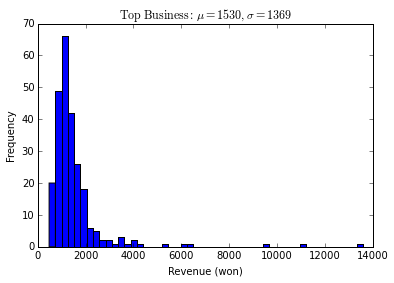

In [22]:
plt.hist(top_business_revenue, bins=50)
plt.xlabel('Revenue (won)')
plt.ylabel('Frequency')

# plt.title(r'$\mathrm{Total\ Revenue\ Distribution:}\ \mu=14787,\ \sigma=1369$')

plt.title(r'$\mathrm{Top\ Business:}\ \mu=1530,\ \sigma=1369$')
plt.show()

#### A: 6 out of 250 businesses make more than 5,000--this makes these 6 businesses top 1%. The remaining 244 businesses make less than 5,000. This confirms again that economic polarization is serious. 

Now that we have analyzed quite a bit about our dataset. Let's move on to formulating a hypothesis.

We approach this process by first enumerating some of the insights or information we have gathered so far, because these information will work collectively to provide us a topic. They are as follows.

1. Economic polarization in districts (e.g. 'kangnam', 'seocho' vs rest, top 6 districts vs bottom 19 districts)
2. Economic polarization in businesses ("can 30 % vs 70% be considered polarization?")
3. Top two sectors that generate the most revenue are 'medical' and 'wholesale.'
4. Two sectors that contribute the least in terms of revenue generated are 'education' and 'service.'
5. 7 out of 10 top businesses are located in 'kangnam' 
6. 6 out of 10 top businesses belong to 'medical' sector
7. Top 2 districts that garnered the most revenues consistently in every sector were 'kangnam' and 'seocho.'

<img sc="seoul.png"> </img>

- Hypthesis Formulation

1. Two districts, 'kangnam' and 'seocho', will always fair well even when other districts are not well-off.
2. Since 'medical' and 'wholesale' are the top two sectors that contribute the most to the overall revenue, if they are not doing well, the overall revenue will be heavily influenced. And vice versa.

3. Even in times of economic hardship, top sectors will generate revenue. On the other hand, bottom sectors, such as 'education' and 'service', will be heavily influenced. (Not tested) 

## III. Hypothesis Testing

In this section, we set out to explore and test whether the formulated hypothesis is true or not. For this, we will refer to data visualization system provided by geovision. (http://datablog.geovision.co.kr/index.php/analysis02/)

<img src ='images/home.png'> <img>

### 1. First Hypothesis
### "Will the two districts, 'kangnam' and 'seocho', always fair well even when other districts are not well-off?"

To check whether these two districts do okay even in times of economic trouble, I chose the month, 'October', where decrease in overall revenue (from previous month) was the highest(-12.42%), as shown in below image. However, it must be noted that the decrease could have been higher than other months, because overall revenue in the previous month was high. Indeed, this was the case for 'October.' As a result, I check the month, 'February'(-4.59%) as well. (Note that I skip 'January,' because the information about 'December' of previous year is not available and thus, the same problem can apply)

<img src="images/1_0.png"> <img>

First, let's look at 'October' (-12.42%)

<img src="images/1_1.png"> </img>

#### A: 'Kangnam' decreased by 18.0%. 'Seocho' decreased by 15.1%. ('Seongdong' decreased by 3.9%. 'Mapo' decreased by 18.6%.)

#### A: This is contrary to our hypothesis, but we can still investigate further by asking, "did 'Kangnam' and 'Seocho' see such high decrease in revenue, because 'Kangnam' and 'Seocho' did very well in a previous month?"

Well, let's check 'September'! (+6.0%)

<img src="images/1_2.png"> </img>

#### A: Indeed, though 'Seocho' only saw increase in revenue by 1.5%, the revenue of 'Kangnam' increased by 7.8%! 

Now, let's take a look at 'February' (-4.59%)

<img src="images/1_3.png"> </img>

#### A: 'Kangnam' increased by 1.9%. 'Seocho' decreased by 0.5%. ('Seongdong' increased  by 3.1%. 'Kangseo' decreased by 15.1%.)

#### A: When overall revenue of 18 cities decreased, the overall revenue of 'Kangnam' rather increased by 1.9%. It was one of the 3 districts ('Seongdong','Eunpyeong','Kangnam') that actually increased in total revenue

### Conclusion

In conclusion, although more convincing cases will definitely help to make the hypothesis valid, it can be said for now that the analysis seems to demonstrate that our hypothesis may not be too far-fetched. 

### 2. Second Hypothesis
### "Since 'medical' and 'wholesale' are the top two sectors that contribute the most to the overall revenue, if they are not doing well, the overall revenue will be heavily influenced. And vice versa."

To check this hypothesis, I first looked at the histogram of 'medical' sector. It presents a collection of percent increase in each month, as shown below. 'October' has -2.25%, and 'February' has -0.60%. However, in the month prior to 'October', there was 7.56% increase in revenue (September), while 'January' had 2.91% increase. Like we have done when we were testing the first hypothesis, this needs to be taken into account for normalization. 
For now, I will take a simpler approach and just test both 'February' and 'October.'

<img src="images/2_0.png"> </img>

In the midst of an attempt to test this hypothesis, I discovered that simply looking at 'medical' sector alone would result in misleading analysis. This is because in the month of 'October,' all the other sectors saw decrease in revenue. This is illustrated in the below image.

<img src="images/2_1.png"></img>

For proper testing of this hypothesis, only 'medical' and 'wholesale' sectors have to see decrease in revenue, while all the other sectors have increase in revenue, not to mention additional comlexities involved. Since it does not have the combination needed, it was clear that examination of this hypothesis was no longer feasible.

### Conclusion

This trial allowed me to experience the importance of the art of narrowing down: the reason for my failure with this experiment is a result of not carefully dissecting hypothesis formulation and in the process making it as detailed as possible.

## VI. Conclusion

From this assignment, I realized how much effort and thoughts need to be exerted for proper analysis. Also, the importance of dataset was confirmed again. Overall, the assignment was a challenging yet rewarding experience.